# Testing two available CSV files

#### In this code, I use my generated CSV file, and original file, provided by authors. Then, I tested different combinations to find out, which one shows the best accuracy.

In [1]:
import mysql.connector as mysql
import database as db
import csv, sys
import image_generator
import new_feature_extractor
import numpy as np
import os
import cv2
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as preprocessing
from sklearn import tree
from sklearn import metrics

In [2]:
my = pd.read_csv("feature_values_normalized.csv")
author = pd.read_csv("all_new_features_hier_norm.csv")
train_images = [3, 4, 8, 9, 12, 13, 14, 18, 23, 27, 28, 29, 30, 35, 37, 40, 44, 46, 48, 49, 53, 55, 56, 61, 62, 64, 67, 73, 75, 79, 80, 85, 91, 94, 97, 1, 2, 5, 7, 11, 16, 17, 21, 22, 25, 32, 33, 41, 42, 47, 58, 59, 63, 65, 68, 71, 74, 76, 77, 78, 81, 83, 84, 86, 88, 90, 93, 96, 100, 105]
test_images = [128, 130, 133, 143, 147, 149, 153, 157, 158, 161, 168, 174, 178, 208, 211, 127, 131, 134, 135, 137, 138, 146, 148, 151, 160, 165, 166, 169, 196, 201]
temp = [x-1 for x in train_images]
my_train = my.iloc[temp]
author_train = author.iloc[temp]
temp = [x-1 for x in test_images]
my_test = my.iloc[temp]
author_test = author.iloc[temp]

In [3]:
#=====My features & Author's predictions=====#

X_train = author_train.drop(['Mobilnet_v1', 'Inception_v4', 'Resnet_v_152', 'filename'], axis = 1)
X_test = author_test.drop(['Mobilnet_v1', 'Inception_v4', 'Resnet_v_152', 'filename'], axis = 1)
Y_train = my_train[['Mobilenet_v1']]
Y_test = my_test[['Mobilenet_v1']]

#=====Author's features and my predictions=====#

# X_train = my_train.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
# X_test = my_test.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
# Y_train = author_train[['Mobilnet_v1']]
# Y_test = author_test[['Mobilnet_v1']]

In [4]:
trees = []
for x in range(1, 21):
    tree_model = DecisionTreeClassifier(max_depth=x)
    tree_model.fit(X_train, Y_train)
    print("Depth:", x)
    print("Decision tree accuracy on training set =", tree_model.score(X_train, Y_train))
    print("Decision tree accuracy on test set =", tree_model.score(X_test, Y_test))
    print()
    trees.append(tree_model)

Depth: 1
Decision tree accuracy on training set = 0.8428571428571429
Decision tree accuracy on test set = 0.8666666666666667

Depth: 2
Decision tree accuracy on training set = 0.9142857142857143
Decision tree accuracy on test set = 0.9

Depth: 3
Decision tree accuracy on training set = 0.9142857142857143
Decision tree accuracy on test set = 0.9

Depth: 4
Decision tree accuracy on training set = 0.9571428571428572
Decision tree accuracy on test set = 0.8666666666666667

Depth: 5
Decision tree accuracy on training set = 0.9857142857142858
Decision tree accuracy on test set = 0.9

Depth: 6
Decision tree accuracy on training set = 1.0
Decision tree accuracy on test set = 0.8

Depth: 7
Decision tree accuracy on training set = 1.0
Decision tree accuracy on test set = 0.9

Depth: 8
Decision tree accuracy on training set = 1.0
Decision tree accuracy on test set = 0.8666666666666667

Depth: 9
Decision tree accuracy on training set = 1.0
Decision tree accuracy on test set = 0.8333333333333334

D

[1. 0. 0. 0. 0. 0. 0.]


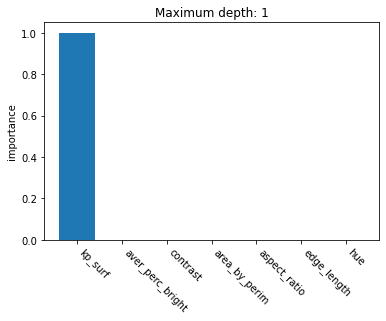

[0.66156324 0.         0.         0.09748934 0.         0.24094742
 0.        ]


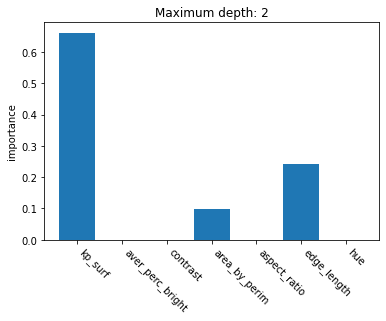

[0.61199295 0.         0.         0.13810461 0.02700898 0.22289346
 0.        ]


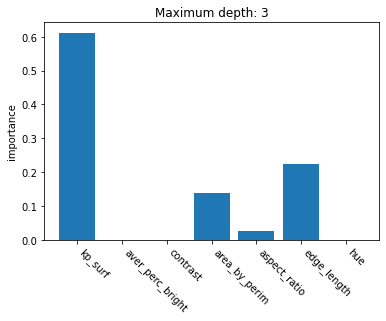

[0.48768246 0.08066581 0.06168562 0.11704765 0.02152281 0.23139565
 0.        ]


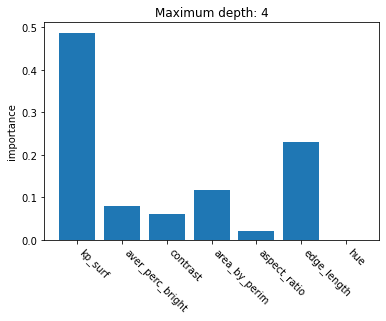

[0.44664908 0.14775726 0.06675634 0.10719932 0.06896431 0.1626737
 0.        ]


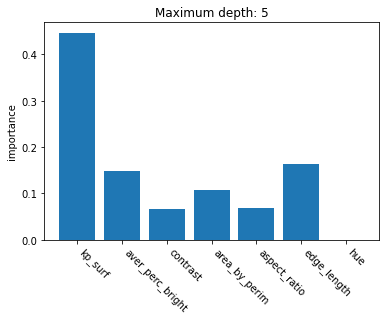

[0.4232     0.14       0.10602941 0.14823802 0.02839924 0.15413333
 0.        ]


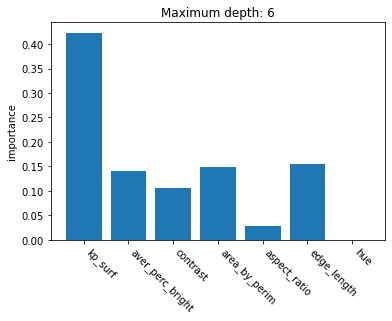

[0.46986667 0.07       0.06325163 0.15407135 0.01867701 0.22413333
 0.        ]


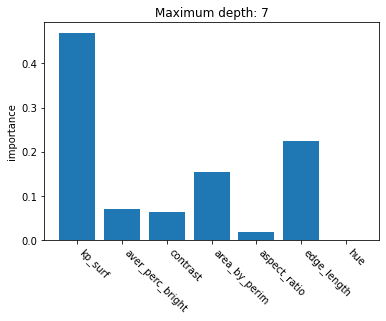

[0.4757     0.07972222 0.12352941 0.10157135 0.01867701 0.2008
 0.        ]


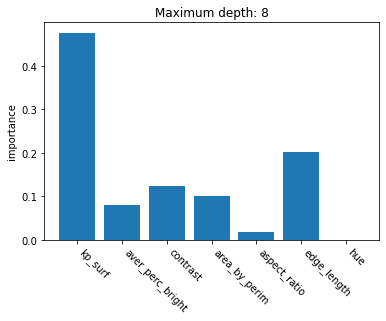

[0.53208889 0.07       0.05352941 0.10157135 0.01867701 0.22413333
 0.        ]


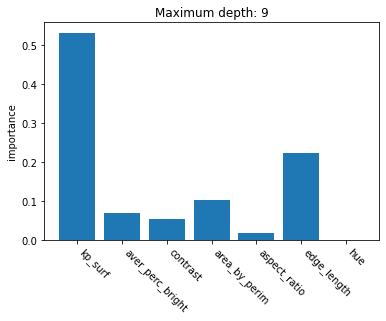

[0.52236667 0.14972222 0.05352941 0.10157135 0.01867701 0.15413333
 0.        ]


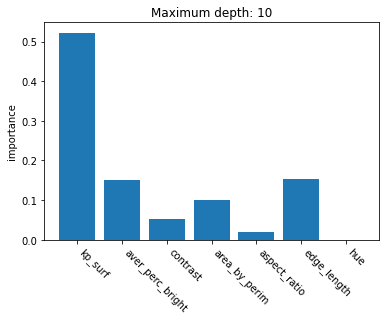

[0.4757     0.07972222 0.05352941 0.14823802 0.08867701 0.15413333
 0.        ]


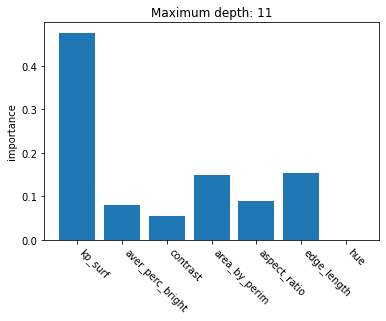

[0.4757     0.07972222 0.12352941 0.10157135 0.01867701 0.2008
 0.        ]


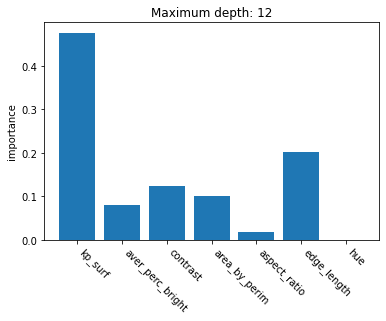

[0.46986667 0.07       0.11575163 0.10157135 0.08867701 0.15413333
 0.        ]


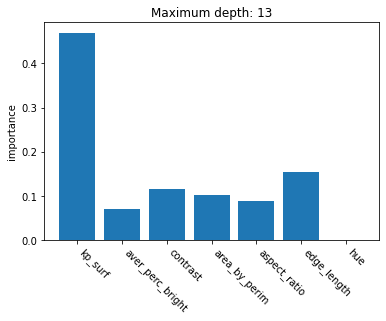

[0.4232     0.14       0.15269608 0.11129357 0.01867701 0.15413333
 0.        ]


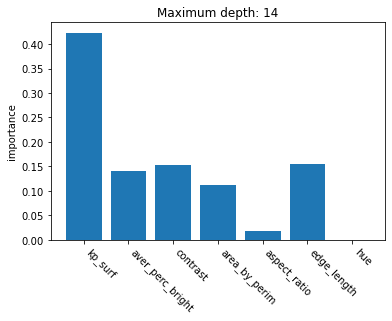

[0.4757     0.07972222 0.05352941 0.14823802 0.01867701 0.22413333
 0.        ]


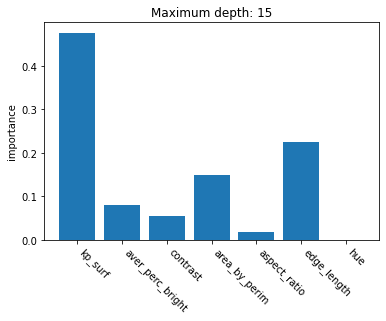

[0.4232     0.11666667 0.11575163 0.10157135 0.01867701 0.22413333
 0.        ]


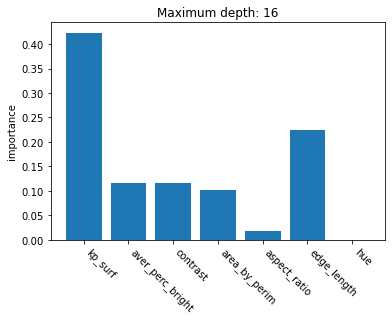

[0.48542222 0.07       0.10019608 0.10157135 0.01867701 0.22413333
 0.        ]


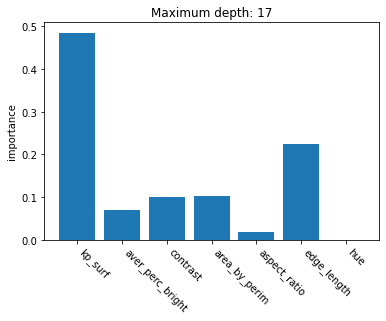

[0.46986667 0.07       0.06325163 0.15407135 0.08867701 0.15413333
 0.        ]


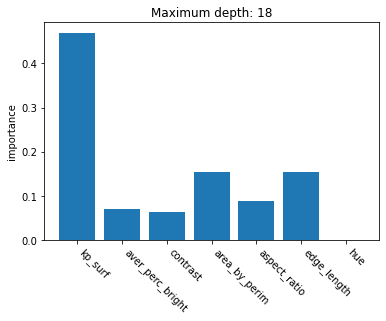

[0.4757     0.07       0.05352941 0.15796024 0.08867701 0.15413333
 0.        ]


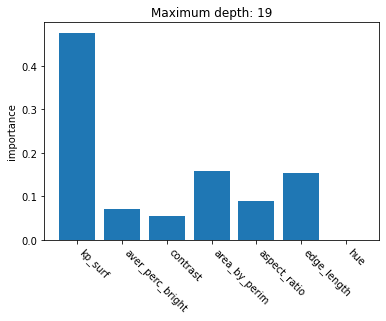

[0.4932     0.04666667 0.10602941 0.11129357 0.01867701 0.22413333
 0.        ]


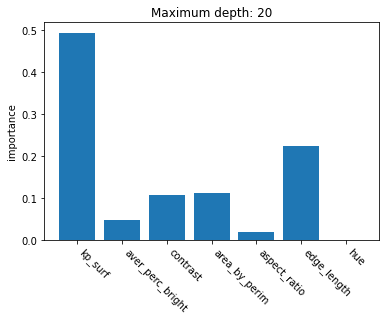

In [5]:
for x in range(len(trees)):
    feature_names = ['kp_surf', 'aver_perc_bright', 'contrast', 'area_by_perim', 'aspect_ratio', 'edge_length', 'hue']
    ypos = np.arange(len(feature_names))

    plt.xticks(ypos, feature_names)
    plt.ylabel("importance")
    plt.title("Maximum depth: {}".format(x+1))
    plt.bar(ypos, trees[x].feature_importances_)
    plt.xticks(rotation=-45, ha='left')
    print(trees[x].feature_importances_)
    plt.show()

Logistic regression accuracy on training set = 0.7
Logistic regression accuracy on test set = 0.8333333333333334


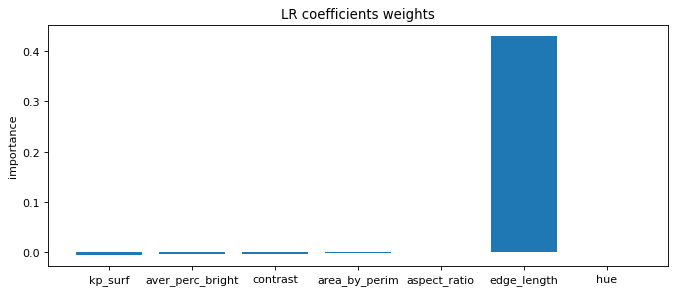

In [6]:
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import figure
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, Y_train)
print("Logistic regression accuracy on training set =", log_reg_model.score(X_train, Y_train))
print("Logistic regression accuracy on test set =", log_reg_model.score(X_test, Y_test))

feature_names = ['kp_surf', 'aver_perc_bright', 'contrast', 'area_by_perim', 'aspect_ratio', 'edge_length', 'hue']

figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
ypos = np.arange(len(feature_names))

plt.xticks(ypos, feature_names)
plt.ylabel("importance")
plt.title("LR coefficients weights")
plt.bar(ypos, log_reg_model.coef_[0])
plt.show()

In [7]:
my_mobil = my[['Mobilenet_v1']]
author_mobil = author[['Mobilnet_v1']]

In [8]:
author_mobil = author_mobil.head(n = 5000)
author_mobil

,Mobilnet_v1
0,1
1,0
2,1
3,1
4,0
...,...
4995,0
4996,1
4997,1
4998,0


In [9]:
result = pd.concat([my_mobil, author_mobil], axis = 1)

In [10]:
result['difference'] = np.where(result["Mobilenet_v1"] == result["Mobilnet_v1"], True, False)

In [11]:
from collections import Counter

Y = result['difference']
print("Mobilnet_v1 column = {}".format(Counter(Y)))

Mobilnet_v1 column = Counter({True: 4269, False: 731})


In [12]:
different = np.where(result["difference"] == False)

In [13]:
my_different = my.iloc[different]
author_different = author.iloc[different]

In [14]:
my_different = my_different[['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152']]
author_different = author_different[['Mobilnet_v1']]

In [15]:
my_different['author'] = author_different[['Mobilnet_v1']]
my_different['mob_diff'] = np.where((my_different['Mobilenet_v1'] == author_different['Mobilnet_v1']), True, False)
my_different['inc_diff'] = np.where((my_different['Inception_v4'] == author_different['Mobilnet_v1']), True, False)
my_different['res_diff'] = np.where((my_different['Resnet_v1_152'] == author_different['Mobilnet_v1']), True, False)

In [16]:
my_different

,Mobilenet_v1,Inception_v4,Resnet_v1_152,author,mob_diff,inc_diff,res_diff
9,1,0,0,0,False,True,True
21,1,0,0,0,False,True,True
28,0,0,1,1,False,False,True
29,0,0,1,1,False,False,True
32,1,0,0,0,False,True,True
...,...,...,...,...,...,...,...
4950,0,1,0,1,False,True,False
4958,0,1,0,1,False,True,False
4979,0,1,0,1,False,True,False
4994,1,0,0,0,False,True,True


In [17]:
Y = my_different['mob_diff']
print("Mobilnet_v1 = {}".format(Counter(Y)))

Y = my_different['inc_diff']
print("Inception_v4 = {}".format(Counter(Y)))

Y = my_different['res_diff']
print("Resnet_v1_152 = {}".format(Counter(Y)))

Mobilnet_v1 = Counter({False: 731})
Inception_v4 = Counter({True: 640, False: 91})
Resnet_v1_152 = Counter({True: 437, False: 294})


In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(my_different)

,Mobilenet_v1,Inception_v4,Resnet_v1_152,author,mob_diff,inc_diff,res_diff
9,1,0,0,0,False,True,True
21,1,0,0,0,False,True,True
28,0,0,1,1,False,False,True
29,0,0,1,1,False,False,True
32,1,0,0,0,False,True,True
43,1,0,0,0,False,True,True
60,0,0,0,1,False,False,False
64,1,0,0,0,False,True,True
76,1,0,0,0,False,True,True
87,1,0,0,0,False,True,True


In [19]:
Y = my_different['Mobilenet_v1']
print("Mobilnet_v1 = {}".format(Counter(Y)))

Y = my_different['Inception_v4']
print("Inception_v4 = {}".format(Counter(Y)))

Y = my_different['Resnet_v1_152']
print("Resnet_v1_152 = {}".format(Counter(Y)))

Mobilnet_v1 = Counter({1: 400, 0: 331})
Inception_v4 = Counter({0: 491, 1: 240})
Resnet_v1_152 = Counter({0: 694, 1: 37})


In [20]:
indexes = my_different.index.values.tolist()
show_images = my.iloc[indexes]
show_images = show_images['filename']
show_images = show_images.tolist()

In [21]:
for x in range(len(show_images)):
    show_images[x] = 'images/val/images/' + str(show_images[x]).zfill(8)

In [22]:
show_images

['images/val/images/ILSVRC2012_val_00000010.JPEG',
 'images/val/images/ILSVRC2012_val_00000022.JPEG',
 'images/val/images/ILSVRC2012_val_00000029.JPEG',
 'images/val/images/ILSVRC2012_val_00000030.JPEG',
 'images/val/images/ILSVRC2012_val_00000033.JPEG',
 'images/val/images/ILSVRC2012_val_00000044.JPEG',
 'images/val/images/ILSVRC2012_val_00000061.JPEG',
 'images/val/images/ILSVRC2012_val_00000065.JPEG',
 'images/val/images/ILSVRC2012_val_00000077.JPEG',
 'images/val/images/ILSVRC2012_val_00000088.JPEG',
 'images/val/images/ILSVRC2012_val_00000102.JPEG',
 'images/val/images/ILSVRC2012_val_00000104.JPEG',
 'images/val/images/ILSVRC2012_val_00000106.JPEG',
 'images/val/images/ILSVRC2012_val_00000112.JPEG',
 'images/val/images/ILSVRC2012_val_00000115.JPEG',
 'images/val/images/ILSVRC2012_val_00000118.JPEG',
 'images/val/images/ILSVRC2012_val_00000147.JPEG',
 'images/val/images/ILSVRC2012_val_00000159.JPEG',
 'images/val/images/ILSVRC2012_val_00000168.JPEG',
 'images/val/images/ILSVRC2012_

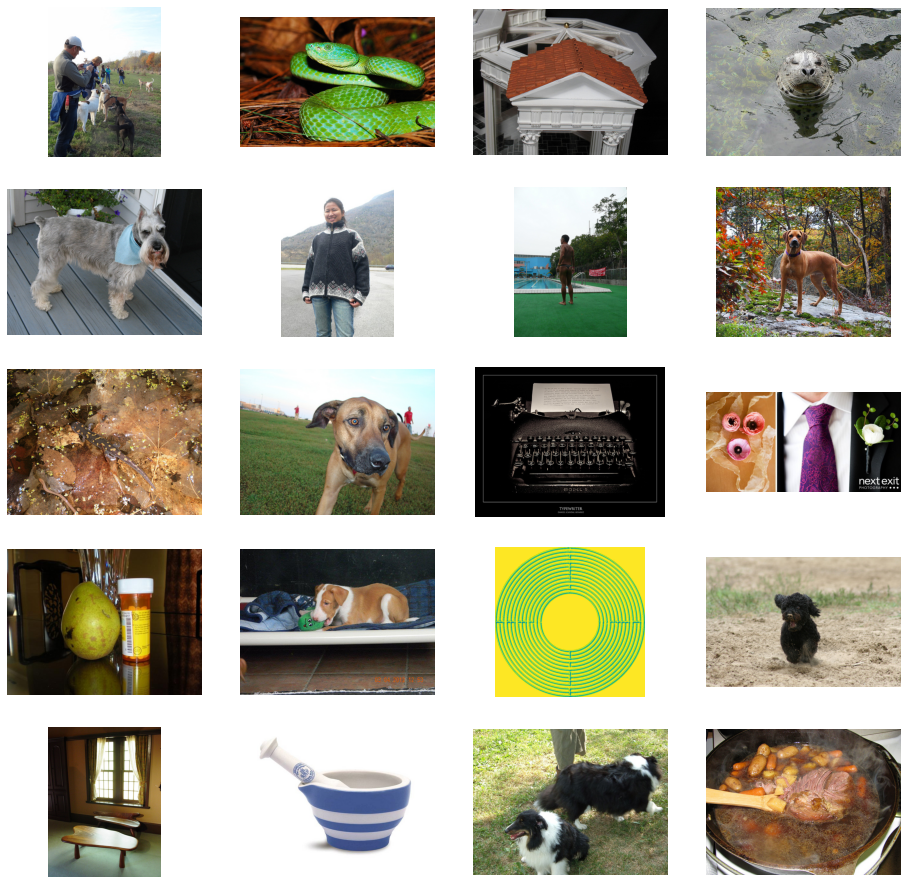

In [24]:
%matplotlib inline
import matplotlib.image as mpimg
w=10
h=10
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = mpimg.imread(show_images[i])
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

In [28]:
compare = my[['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152']]
compare['author'] = author['Mobilnet_v1']
compare['mob_diff'] = np.where((compare['Mobilenet_v1'] == author_mobil['Mobilnet_v1']), True, False)
compare['inc_diff'] = np.where((compare['Inception_v4'] == author_mobil['Mobilnet_v1']), True, False)
compare['res_diff'] = np.where((compare['Resnet_v1_152'] == author_mobil['Mobilnet_v1']), True, False)

In [29]:
compare

,Mobilenet_v1,Inception_v4,Resnet_v1_152,author,mob_diff,inc_diff,res_diff
0,1,0,0,1,True,False,False
1,0,0,0,0,True,True,True
2,1,0,0,1,True,False,False
3,1,0,0,1,True,False,False
4,0,1,0,0,True,False,True
...,...,...,...,...,...,...,...
4995,0,0,0,0,True,True,True
4996,1,0,0,1,True,False,False
4997,0,1,0,1,False,True,False
4998,0,0,0,0,True,True,True


In [30]:
Y = compare['mob_diff']
print("Mobilnet_v1 = {}".format(Counter(Y)))

Y = compare['inc_diff']
print("Inception_v4 = {}".format(Counter(Y)))

Y = compare['res_diff']
print("Resnet_v1_152 = {}".format(Counter(Y)))

Mobilnet_v1 = Counter({True: 4269, False: 731})
Inception_v4 = Counter({False: 3643, True: 1357})
Resnet_v1_152 = Counter({False: 3583, True: 1417})


In [36]:
values = compare.values.tolist()
check = []
values
for x in range(len(values)):
    if values[x][0] == values[x][3] or values[x][1] == values[x][3] or values[x][2] == values[x][3]:
        check.append(True)
    else:
        check.append(False)

In [40]:
print("Check if author's value is equal to any of my 3 networks:", Counter(check))

Check if author's value is equal to any of my 3 networks: Counter({True: 4946, False: 54})
